In [ ]:
%matplotlib inline


# N170 run experiment

This example demonstrates the initiation of an EEG stream with eeg-notebooks, and how to run 
an experiment. 


Setup
---------------------  

Imports



In [4]:
import sys
sys.path.append("..\\")
#print(sys.path)

import os
# import importlib.util
# sys.path.append('/../../eegnb')
# # Considering your module contains a function called my_func, you could import it:
import eegnb

from eegnb import generate_save_fn
from eegnb.devices.eeg import EEG
from eegnb.experiments.visual_n170 import n170
#from eegnb.experiments.test import test
#from eegnb.visualoddbal_simple import visualoddbal_stim
from visualoddball import visualoddball 
from visualoddball import visualoddbal_stim
#import eegnb.experiments.visualoddbal_simple

# Define some variables
board_name = "muse2"
experiment = "visual_n170"
subject_id = 0
session_nb = 0
record_duration = 10

## Initiate EEG device

Start EEG device



In [5]:
eeg_device = EEG(device=board_name)

# Create save file name
save_fn = generate_save_fn(board_name, experiment, subject_id, session_nb)
print(save_fn)

C:\Users\matil\.eegnb\data\visual_n170\local\muse2\subject0000\session000\recording_2023-02-16-23.40.47.csv


Run experiment
---------------------  




In [6]:
visualoddbal_stim.present(duration=record_duration)

start printing


Run visual experiement
[33769, 34770, 37772, 38775, 39776, 41275, 42776] 7


In [7]:
# Some standard pythonic imports
import os
from collections import OrderedDict
import warnings
warnings.filterwarnings('ignore')

# MNE functions
from mne import Epochs,find_events

# EEG-Notebooks functions
from eegnb.analysis.utils import load_data,plot_conditions
from eegnb.datasets import fetch_dataset
# path should be in the format: 
# C:\Users\matil\.eegnb\data\visual_n170\local\muse2\subject0999\session001
subject = 'subject0000'
session = 'session000'
eegnb_data_path = os.path.join(os.path.expanduser('~/'),'.eegnb', 'data')  
n170_data_path = os.path.join(eegnb_data_path, 'visual_n170', 'local', 'muse2', subject, session)
print(eegnb_data_path)

print(n170_data_path)
if not os.path.isdir(n170_data_path):
    print('no dir')

C:\Users\matil/.eegnb\data
C:\Users\matil/.eegnb\data\visual_n170\local\muse2\subject0000\session000


In [8]:
subject=0000
session=000
raw = load_data(subject,session,
                experiment='visual_n170', site='local', device_name='muse2', data_dir=eegnb_data_path, inc_chans=[1,2,3,4])



Loading these files: 

C:\Users\matil\.eegnb\data\visual_n170\local\muse2\subject0000\session000\recording_2023-01-14-11.08.04.csv




['TP9', 'AF7', 'AF8', 'TP10', 'Right AUX', 'stim']
['TP9', 'AF7', 'AF8', 'TP10', 'Right AUX', 'stim']
Creating RawArray with float64 data, n_channels=6, n_times=30824
    Range : 0 ... 30823 =      0.000 ...   120.402 secs
Ready.


In [9]:
#print(raw_1[:,0])
bool= 'stim' in raw
print(raw[4,:])
raw.compute_psd().plot()

(array([[ 1.80660e-05, -1.73340e-04, -1.81641e-04, ...,  1.86523e-04,
        -8.39840e-05, -1.05957e-04]]), array([0.00000000e+00, 3.90625000e-03, 7.81250000e-03, ...,
       1.20394531e+02, 1.20398438e+02, 1.20402344e+02]))
Effective window size : 1.000 (s)


AttributeError: _psd_funcmpute

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 30 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 30.00 Hz: -6.02, -6.02 dB

Effective window size : 1.000 (s)


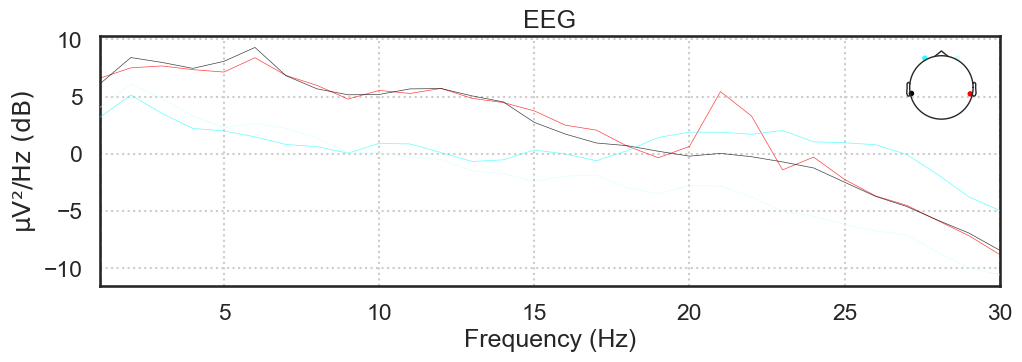

In [11]:
raw.filter(1,30, method='iir')
raw.compute_psd(fmin=1, fmax=30).plot()

In [18]:
import numpy as np
event_toadd = np.ndarray(shape=(10,3), dtype=float)
print(event_toadd[0,1])
for i in range(len(event_toadd)): event_toadd[i,1] = 0;
for i in range(len(event_toadd)): event_toadd[i,0] = i;
event_toadd[:,2]  = [1, 1, 1, 1, 2, 2, 2, 2, 30, 2];
print(event_toadd[:,:])
raw.add_events(event_toadd, stim_channel='stim', replace=False)
print(raw[:,:])

8.43857664006115e-07
[[ 0.  0.  1.]
 [ 1.  0.  1.]
 [ 2.  0.  1.]
 [ 3.  0.  1.]
 [ 4.  0.  2.]
 [ 5.  0.  2.]
 [ 6.  0.  2.]
 [ 7.  0.  2.]
 [ 8.  0. 30.]
 [ 9.  0.  2.]]
(array([[-7.64509473e-08,  8.43857664e-07,  2.10722494e-06, ...,
         2.84368560e-05,  1.64206201e-05, -1.00497423e-08],
       [ 5.39788933e-09,  2.98938014e-06,  6.03008114e-06, ...,
         8.71617158e-06,  4.86414271e-06,  3.60948180e-09],
       [-2.72973012e-10, -2.18301675e-06, -4.40145911e-06, ...,
        -2.47834268e-06, -1.21053351e-06,  4.97259490e-08],
       [-1.20958722e-07, -1.59919335e-05, -2.76102885e-05, ...,
         2.51107992e-05,  1.42920296e-05,  1.18314060e-08],
       [ 2.10660000e+01, -1.68340000e+02, -1.78641000e+02, ...,
         1.86523000e+02, -8.39840000e+01, -1.05957000e+02]]), array([0.00000000e+00, 3.90625000e-03, 7.81250000e-03, ...,
       1.20394531e+02, 1.20398438e+02, 1.20402344e+02]))


In [19]:
# Create an array containing the timestamps and type of each stimulus (i.e. face or house)
events = find_events(raw,shortest_event=1, min_duration=0.003)
event_id = {'House': 1, 'Face': 2}
print(events)

Trigger channel has a non-zero initial value of 21 (consider using initial_event=True to detect this event)
15157 events found
Event IDs: [  2   3   4   5   7   8   9  11  12  13  14  15  16  17  18  19  20  21
  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39
  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57
  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75
  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93
  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111
 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129
 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147
 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165
 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183
 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201
 202 203 204 205 206 207 208 209 210 211 212 213 214 215 21

In [17]:
# Create an MNE Epochs object representing all the epochs around stimulus presentation
epochs = Epochs(raw, events=events, event_id=event_id, 
                tmin=-0.1, tmax=0.6, baseline=None,
                reject={'eeg': 5e-5}, preload=True, 
                verbose=False, picks=[0,1,2,3])
print('sample drop %: ', (1 - len(epochs.events)/len(events)) * 100)
epochs

ValueError: No matching events found for House (event id 1)